<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/Hw2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2.4

2.4.1. MLE for random samples

MLE stands for Maximum Likelihood Estimation. It is a statistical method to estimate the parameters of a probability distribution by maximizing its likelihood function.

Concepts:
Likelihood function = product of individual probabilities or probability densities of the observed values

log-likelihood: MLE maximizes this function to find θ

MLE: maximum likelihood estimate of θ is the value θhat that maximizes
θhat = argmaxθ L(θ|X1, X2, ..., Xn)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

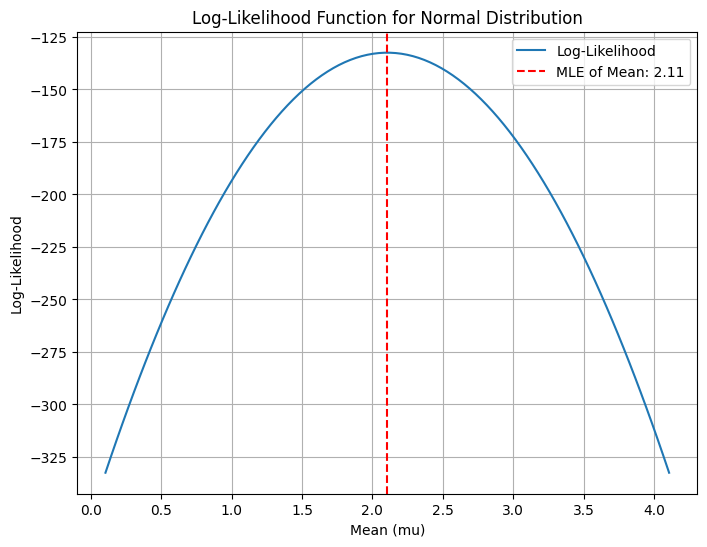

MLE of the Mean: 2.105361023528094


In [3]:
def generate_normal_samples(n_samples=100, mu=0, sigma=1):
    samples = np.random.normal(mu, sigma, n_samples)
    return samples

def mle_normal_mean(samples, sigma=1):
    mle_mu = np.mean(samples)

    def log_likelihood(mu):
        return -0.5 * len(samples) * np.log(2 * np.pi * sigma**2) - np.sum((samples - mu)**2) / (2 * sigma**2)

    mu_values = np.linspace(mle_mu - 2, mle_mu + 2, 100)
    log_likelihood_values = [log_likelihood(mu) for mu in mu_values]

    plt.figure(figsize=(8, 6))
    plt.plot(mu_values, log_likelihood_values, label='Log-Likelihood')
    plt.axvline(mle_mu, color='red', linestyle='--', label=f'MLE of Mean: {mle_mu:.2f}')
    plt.title('Log-Likelihood Function for Normal Distribution')
    plt.xlabel('Mean (mu)')
    plt.ylabel('Log-Likelihood')
    plt.legend()
    plt.grid(True)
    plt.show()

    return mle_mu

samples = generate_normal_samples(n_samples=100, mu=2, sigma=1)

mle_mu = mle_normal_mean(samples, sigma=1)

print(f"MLE of the Mean: {mle_mu}")


2.4.2. Linear regression

Linear regression models the relationship between a dependent variable and one or more independent variables. The goal of linreg is to find a linear equation which can be used to predict the dependent variable based on the values of the independent variables

Concepts:
simple linreg: one independent variable and one dependent variable. The relationship between the two variables is modeled as a straight line
y = B0 + B1x + ϵ

Multiple linreg: extends simple linear regression to include multiple independent variables. The model is expressed as
y = B0 + B1x1 + ... + BnXn

Ordinary Least Squares:
minimizes the sum of squared residuals, which is the sum of the squared differences between the observed values and the predicted values

Assumptions:
  1. Linearity: The relationship between the independent and dependent variables is linear.
  2. Independence: The observations are independent of each other.
  3. Homoscedasticity: The variance of the residuals is constant across all levels of the independent variables.
  4. Normality: The residuals (errors) are normally distributed.

Evaluation Metrics:
  1. R^2 = proportion of the variance in the dependent variable that is predictable from the independent variables (0 to 1)
  2. Mean Square Error: average of the squared differences between actual and predicted values


Intercept (beta_0): [4.21509616]
Coefficient (beta_1): [[2.77011339]]
Mean Squared Error (MSE): 0.8065845639670531
R-squared (R^2): 0.7692735413614223


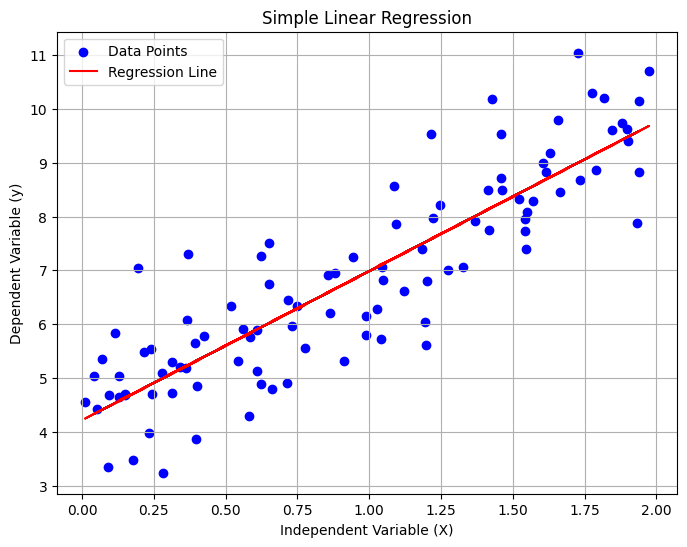

In [5]:
 #simple linreg
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"Intercept (beta_0): {model.intercept_}")
print(f"Coefficient (beta_1): {model.coef_}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()


Intercept (beta_0): 3.772272264101705
Coefficients (beta_1, beta_2): [3.16933339 2.17747302]
Mean Squared Error (MSE): 0.9813829922788827
R-squared (R^2): 0.8375977028740944


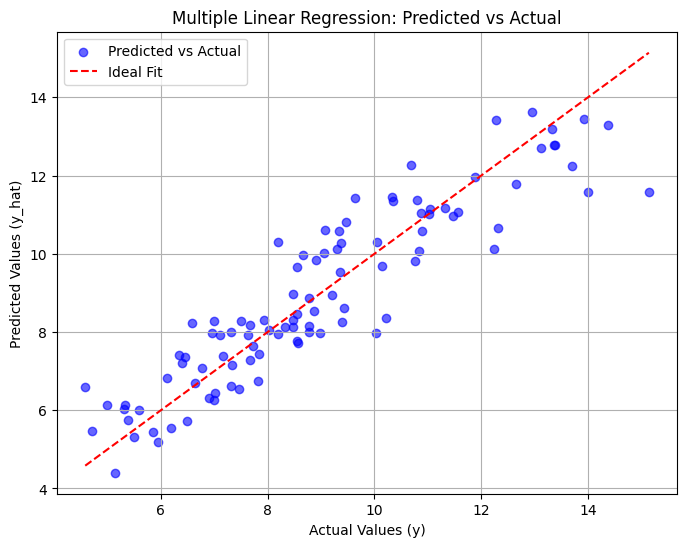

In [7]:
#multiple linreg
np.random.seed(42)
X = 2 * np.random.rand(100, 2)
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"Intercept (beta_0): {model.intercept_}")
print(f"Coefficients (beta_1, beta_2): {model.coef_}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_hat)')
plt.grid(True)
plt.legend()
plt.show()